
# Modelo com Redes Neurais para classificação de imagens entre gatos e cachorros

Trabalho desenvolvido para disciplina Fundamentos da Internet das Coisas do IME-USP no período 2020.2 com o intuito de analisar dados de IoT com o TensorFlow.

## Equipe:


*   Caio Calisto Gaede Hirakawa - 7590899
*   Cayami Cavalcante - 5138740
*   Elaine Silva Rocha Sobreira - 11046072
*   Marcus Vinícius de Lima Rebolo - 11596503

## Descrição do trabalho

Com o objetivo de automatizar a classificação de imagens entre gatos e cachorros, utilizamos uma rede neural convolucional.

## Conjunto de dados

 O banco de dados utilizado para o treinamento original pode ser acessado em https://www.kaggle.com/chetankv/dogs-cats-images.  Ele consiste em uma pasta chamada training_set, com dois subdiretórios, "cats" e "dogs", que serão interpretados como as classes a serem aprendidas pelo modelo. Há outra pasta, test_set, contendo subdiretórios do mesmo nome, que serão utilizadas para validar o modelo durante o treinamento.
 Utilizamos 2.000 imagens, sendo 1.000 para cada conjunto (cães e gatos), para validação durante o treinamento, utilizamos 200 imagens para cada um dos conjuntos.
 Para validação final, baixamos outro conjunto de imagens, baixada em: https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip.

Esse conjunto de imagens são compostas de 11.741 imagens de gatos e 11.699 imagens de gatos, no entanto, utilizamos 2.000 imagens para cada um dos conjuntos.

### Link para download
- [https://colab.research.google.com/drive/1BdbotXJV40sr4fcI_JVtRRo7CDX6SUwA?usp=sharing](https://colab.research.google.com/drive/1BdbotXJV40sr4fcI_JVtRRo7CDX6SUwA?usp=sharing)

### Quantidade de dados utilizados
- Treinamento
>2.000 (1.000 para cada um)
- Validação
>200 (100 para cada um)
- Teste
>4.000 (2.000 Para cada um)

## Descrição do melhor resultado

- Método
>Sequencial

- Camadas
>Conv2D - (2D convolution layer)

>MaxPooling2D - (Max pooling operation for 2D spatial data)

>Dropout

>Dense

- Épocas:
>150
- Passos
>50
- Acurácia
>99,65% para Cães, de acordo com validação final com 4000 novas imagens de cães e gatos

```
PetImages
|
|____cats
|      cat1.jpg
|      cat2.jpg
|      ...
|      
|____dogs
|     dog1.jpg
|     dog2.jpg
|     ...
|
cats_vs_dogs
|
|___training_set
|    |____cats
|    |      cat.1.jpg
|    |      cat.2.jpg
|    |      ...
|    |      
|    |____dogs
|          dog.1.jpg
|          ...
|
|___test_set
|   |_____cats
|   |      cat0.jpg
|   |       ...
|   |_____dogs
|          dog0.jpg
|          ...
|
|___saved_model
|   |     001_modelo_treinado_com_xyz_epoch.h5
|   |     001_modelo_treinado_com_xyz_epoch.json
|   |     001_modelo_treinado_com_xyz_epoch.png
|   |     ...
|   |_____Backup
|   |     021_modelo_treinado_com_xyz_epoch.h5
|   |     021_modelo_treinado_com_xyz_epoch.json
|   |     021_modelo_treinado_com_xyz_epoch.png
          ...           
```

## Reprodução dos modelos

Na pasta saved_model e saved_model/Backup, deixamos os testes que fizemos para atingir o melhor resultado.
É possível reproduzir o teste com o modelo gravado (xyz.h5) e o histórico de cada época (epochs) para uso nos gráficos, bem como um gráfico do modelo executado.

## Rede Neural Convolucional

A rede neural é vagamente inspirada em redes de neurônios de animais. E, cada camada os neurônios são conectados, e em cada nó realiza um cálculo matemático simples e repassa para o próximo nó.
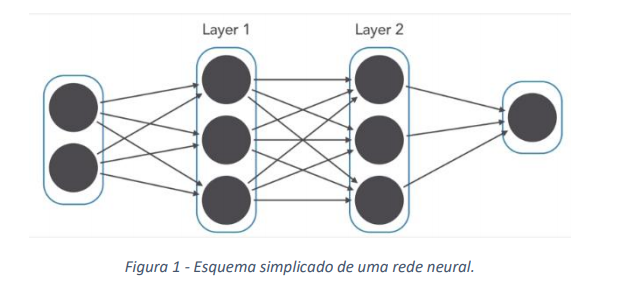

In [69]:
#importa bibliotecas necessárias
from tensorflow.keras.models import Sequential,  save_model, load_model #importing our deep learing libraries
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import drive
from keras import backend as K 
import numpy as np 
import pandas as pd
import tensorflow as tf
import glob
import json
import os

In [70]:
# para acessar o banco de dados, montamos o drive no runtime do colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# Define diretório inicial de trabalho e verifica se as imagens estão carregadas
os.chdir('/content/drive/My Drive/Disciplinas - 2020/Projeto com  TensorFlow/cats_vs_dogs')
print(os.listdir()) #mostra o conteudo da pasta
print(os.listdir('../PetImages/')) #mostra o conteudo para Testar o Algoritmo

print(os.getcwd()) #--> Mostra o diretório de trabalho atual

['test_set', 'training_set', 'saved_model', 'model.png', 'Final_Elaine']
['Cat', 'Dog']
/content/drive/My Drive/Disciplinas - 2020/Projeto com  TensorFlow/cats_vs_dogs


In [72]:
# Definindo o diretório de Treinamento
train_dir = './training_set'

# Definindo o diretório de Test 
test_dir = './test_set'

# Define o diretório com as imagens de gatos para o treinamento
train_dir_cats = './training_set/cats'

# Define o diretório com as imagens de cachorros para o treinamento
train_dir_dogs = './training_set/dogs'

# Define o diretório com as imagens de gatos para o teste
test_dir_cats = './test_set/cats' 

# Define o diretório com as imagens de cachorros para o teste
test_dir_dogs = './test_set/dogs'

# Define o diretório Final com as imagens de cachorros para o teste
final_teste_dir_dogs = '../PetImages/Dog'

# Define o diretório Final com as imagens de Gatos para o teste
final_teste_dir_cats = '../PetImages/Cat'

In [73]:
# Uso de "Imagem Aumentada", onde a mesma imagem é modificada para vários tamanhos, formatos, inversão.
# Essa função faz que haja a possibilidade de uso de menos imagens, porém como aumento da acuracidade do modelo
data_generator = ImageDataGenerator(rescale = 1./250, 
                                    zoom_range = 0.2,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
                                    ) 

In [74]:
# Cria conjuntos treinamento e teste

# directory: Valida a pasta com as classes (gatos e cachorros). O Keras automaticamente identifica o padrão de diretórios
# interpreta cada subdiretório como uma classe
# target_size: Valida a imagem e redimensiona para o valor especificado, caso não esteja no tamanho
# color_mode: Pode ser “grayscale” “rgb”, mas não estamos usando
# batch_size: Número de imagens que serão geradas a cada lote processado
# class_mode: “binary” se houver só duas classes (como nosso caso)

batch_size = 20
training_data = data_generator.flow_from_directory(directory = train_dir,
                                                  target_size = (150,150),
                                                  batch_size = batch_size,
                                                  class_mode  = 'binary')
testing_data = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (150,150),
                                                  batch_size = batch_size,
                                                  class_mode  = 'binary')

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [75]:
# preparamos o nosso modelo de CNN (Convolutional Neural Network)
model = Sequential() # O modelo sequencial é feito numa sequência de camadas

# Camada de convulução 2D, escaneia a imagem atrás de padrões como bordas, cores e gradientes
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = training_data.image_shape))
# Camada de Max Pooling, diminui a imagem
model.add(MaxPooling2D(pool_size = (2, 2)))
# Cada Dropout, desativa alguns neurônios aleatororiamente para evitar que o modelo fique viciado (evitar overfitting)
model.add(Dropout(rate = 0.3))

# repetimos as camadas (chamadas de blocos de convolução) adicionando mais filtros na convulução e diminuindo o valor do dropout
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(filters = 126, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))

# Achata os dados
model.add(Flatten())
# Camada Dense, completamente conectada com a camada anterior 
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(rate = 0.15))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.1))

# A última camada densa reduz o modelo treinado às duas categorias do problema, e usa
#função de ativação softmax que transforma o array em um array de probabilidades entre 0 e 1
model.add(Dense(units = len(set(training_data.classes)), activation = 'softmax'))

# compilamos o modelo
model.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [76]:
# model.summary() #resumo do modelo

In [77]:
# Treinando o modelo

epoch = 150 #150 epochs para real e 2 para elaborar o cenário (aceletar o processo)

fitted_model = model.fit(
                        training_data,
                        steps_per_epoch = 50, # typically be equal to ceil(num_samples / batch_size)
                        epochs = epoch, 
                        validation_data = testing_data,
                        verbose=1, # Usar 0 para não mostra saída de cada epoch                        
                        validation_steps = 10
                         )
# **************************************************************
# ***** Teste para evitar overfitting - não foi necessário *****
# **************************************************************

# from keras.callbacks import ModelCheckpoint
# from keras.callbacks import EarlyStopping

# checkpoint = ModelCheckpoint(filepath='./best_model.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1)
# model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=32, callbacks=checkpoint)

# callbacks = [EarlyStopping(monitor = 'val_loss', patience=10),
#              ModelCheckpoint(filepath='./best_model.h5', monitor='val_loss', mode='min', save_best_only=True)]



# fitted_model = model.fit(
#                         training_data,
#                         steps_per_epoch = 50, # typically be equal to ceil(num_samples / batch_size)
#                         epochs = epoch, 
#                         validation_data = testing_data,
#                         callbacks=EarlyStopping(monitor='val_loss', mode='auto', baseline=0.5, patience=10),
#                         verbose=1, # Usar 0 para não mostra saída de cada epoch                        
#                         validation_steps = 10
#                          )

Epoch 1/150
50/50 [==============================] - 10s 202ms/step - loss: 0.6965 - accuracy: 0.5250 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/150
50/50 [==============================] - 10s 198ms/step - loss: 0.6941 - accuracy: 0.4930 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/150
50/50 [==============================] - 10s 199ms/step - loss: 0.6943 - accuracy: 0.4780 - val_loss: 0.6928 - val_accuracy: 0.5500
Epoch 4/150
50/50 [==============================] - 10s 200ms/step - loss: 0.6937 - accuracy: 0.5100 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 5/150
50/50 [==============================] - 10s 199ms/step - loss: 0.6944 - accuracy: 0.4970 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/150
50/50 [==============================] - 10s 199ms/step - loss: 0.6929 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/150
50/50 [==============================] - 10s 199ms/step - loss: 0.6928 - accuracy: 0.4820 - val_loss: 0.6931 - val_accuracy:

In [78]:
# Grava o model atual treinado - será sempre um nome diferente, para manter registro
files = 0
# path, dirs, files = next(os.walk("./saved_model/"))
file_count = len(glob.glob1('./saved_model/',"*.h5"))
# print(file_count)
model_name = ('./saved_model/' + str(file_count + 1).zfill(3) + '_modelo_treinado_com_' + str(epoch) + '_epoch')

model.save(model_name + '.h5' )
with open(model_name + '.json', 'w') as f:
    json.dump(fitted_model.history, f) 

print(model_name)

./saved_model/001_modelo_treinado_com_150_epoch


In [88]:
# Sempre carrega o arquivo mais recente do último modelo gravado!!
files = 0
# path, dirs, files = next(os.walk("./saved_model/"))
file_count = len(glob.glob1('./saved_model/',"*.h5"))

def mid(s, offset, amount):
    return s[offset-1:offset+amount-1]

# Load H.5 file for model
list_of_files_h5 = glob.glob('./saved_model/*.h5') # * means all if need specific format then *.csv
latest_file_h5 = max(list_of_files_h5, key=os.path.getctime)
print ('O último arquivo .h5 gravado foi: ' + latest_file_h5)

model = load_model(latest_file_h5)
print ('O arquivo: ' + mid(latest_file_h5, 15, 50) + ' foi carregado')

# Load Json file for history
list_of_files_json = glob.glob('./saved_model/*.json') # * means all if need specific format then *.csv
latest_file_json = max(list_of_files_json, key=os.path.getctime)
print ('O último arquivo .json gravado foi: ' + latest_file_json)

# ..........................................
# ..........................................
import json,codecs
import numpy as np
def saveHist(path,history):
    
    new_hist = {}
    for key in list(history.history.keys()):
        new_hist[key]=history.history[key]
        if type(history.history[key]) == np.ndarray:
            new_hist[key] = history.history[key].tolist()
        elif type(history.history[key]) == list:
           if  type(history.history[key][0]) == np.float64:
               new_hist[key] = list(map(float, history.history[key]))
            
    print(new_hist)
    with codecs.open(path, 'w', encoding='utf-8') as file:
        json.dump(new_hist, file, separators=(',', ':'), sort_keys=True, indent=4) 

def loadHist(path):
    with codecs.open(path, 'r', encoding='utf-8') as file:
        n = json.loads(file.read())
    return n
# --------------------------------------------
# ..........................................
from keras.callbacks import History 
fitted_model = History()
fitted_model.history =  loadHist(latest_file_json, )
# print(fitted_model.history)

print ('O arquivo com o histórico: ' + mid(latest_file_json, 15, 50) + ' foi carregado')

# --------------------------------------------->>
# Retorna o valor do último epoch (da descrição do arquivo) para ser usado na criação de uma novo gráfico
# --------------------------------------------->>

str1 = latest_file_h5
str2 = mid(str1, str1.find('com_')+5, 50)
str3 = mid(str1, str1.find('com_')+5, str2.find('_epoch'))

print (str1)
print (str2)
print (str3)

epoch = str3
# --------------------------------------------->>
model_name = ('./saved_model/' + str(file_count + 1).zfill(3) + '_modelo_treinado_com_' + str(epoch) + '_epoch')

print (model_name)

# model.summary()

O último arquivo .h5 gravado foi: ./saved_model/001_modelo_treinado_com_150_epoch.h5
O arquivo: 001_modelo_treinado_com_150_epoch.h5 foi carregado
O último arquivo .json gravado foi: ./saved_model/001_modelo_treinado_com_150_epoch.json
O arquivo com o histórico: 001_modelo_treinado_com_150_epoch.json foi carregado
./saved_model/001_modelo_treinado_com_150_epoch.h5
150_epoch.h5
150
./saved_model/002_modelo_treinado_com_150_epoch


In [89]:
# Função para fazer uma previsão de uma determinada imagem utilizando o modelo treinado

def testing_image(image_directory): #testando nosso modelo
    test_image = image.load_img(image_directory, target_size = (150, 150))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image, batch_size=20)
    #result = loaded_model.predict_classes('./saved_model/modelo_treinado.h5')
    # print(result)
    #o número na primeira posição indica a probabilidade de ser "cat", e na segunda
    # posição, de ser "dog"
    if result[0][0]  >  result[0][1]:
        prediction = 'Cat'
    else:
        prediction = 'Dog'
    return prediction

In [90]:
# ********************************************************************************************************
# * testando o modelo contra o grupo de teste Final - Cats (Não utilizado para treinamento do algoritmo) *
# ********************************************************************************************************

from IPython.display import Image, display
cats_as_cats = 0
start = 0
finish = 2000
delta_cat = (finish - start)
for i in range (start, finish): # Existem 5392 arquivos
  image_path = final_teste_dir_cats + '/Cat' + str(i) + '.jpg'
  # display(Image(filename=image_path) )
  # print(testing_image(image_path))
  if(testing_image(image_path) == 'Cat'):
    # print('Cat')
    cats_as_cats = cats_as_cats + 1
  # else:
    # print('Dog')
    

print('Cats correctly predicted: ' + str(cats_as_cats) + '/' + str(delta_cat))

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# bar_cat = ['Encontrado', 'Total']
# height_cat  = [cats_as_cats,delta_cat]
# ax.bar(bar_cat,height_cat)
# plt.show()

Cats correctly predicted: 29/2000


In [91]:
# ********************************************************************************************************
# * testando o modelo contra o grupo de teste Final - Dogs (Não utilizado para treinamento do algoritmo) *
# ********************************************************************************************************

from IPython.display import Image, display
dogs_as_dogs = 0
start = 0
finish = 2000
delta_dog = (finish - start)
for i in range (start, finish): # Existem 5392 arquivos
  image_path = final_teste_dir_dogs + '/Dog' + str(i) + '.jpg'
  # display(Image(filename=image_path) )
  # print(testing_image(image_path))
  if(testing_image(image_path) == 'Dog'):
    # print('Cat')
    dogs_as_dogs = dogs_as_dogs + 1
  # else:
    # print('Dog')
print('Dogs correctly predicted: ' + str(dogs_as_dogs) + '/' + str(delta_dog))

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# bar_dog = ['Encontrado', 'Total']
# height_dog = [dogs_as_dogs,delta_dog]
# ax.bar(bar_dog,height_dog)
# plt.show() 

Dogs correctly predicted: 1993/2000


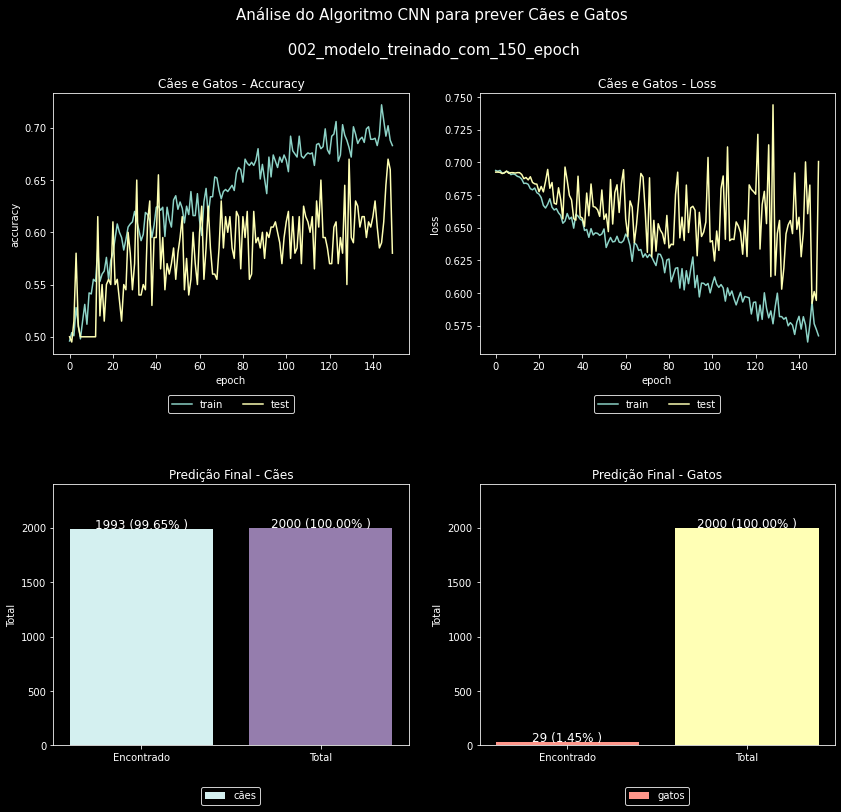

In [92]:
# Gera gráficos referente a essa rodada
# Criar Gráfico para Análise

def mid(s, offset, amount):
    return s[offset-1:offset+amount-1]
filename = mid(model_name, 15, 50)

plt.style.use(['dark_background'])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,12), constrained_layout=False)
fig.suptitle('Análise do Algoritmo CNN para prever Cães e Gatos\n \n ' + filename + '\n \n' , fontsize=15)


# Dados para Accuracy
ax1.plot(fitted_model.history['accuracy'])
ax1.plot(fitted_model.history['val_accuracy'])
ax1.set_title('Cães e Gatos - Accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper center', bbox_to_anchor=(0.5, -0.14),
          fancybox=True, shadow=True, ncol=5)

# Dados para Loss
ax2.plot(fitted_model.history['loss'])
ax2.plot(fitted_model.history['val_loss'])
ax2.set_title('Cães e Gatos - Loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper center', bbox_to_anchor=(0.5, -0.14),
          fancybox=True, shadow=True, ncol=5)

plt.subplots_adjust(hspace = 0.5)
# plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Dados para Predição de Cães
bar_dog = ['Encontrado', 'Total']
height_dog = [dogs_as_dogs,delta_dog]
ax3.bar(bar_dog,height_dog, color=['#D4F0F0', '#957DAD'])
label = (height_dog)
ax3.set_ylim([0, max(height_dog) * 1.20]) # define o eixo y = 20 acima do máximo definido para height_dog
ax3.set_title('Predição Final - Cães')
ax3.set_ylabel('Total')
ax3.legend(['cães'], loc='upper center', bbox_to_anchor=(0.5, -0.14),
          fancybox=True, shadow=True, ncol=5)

# Coloca uma legenda acima da barra
for i in range(0,2):
  ax3.text(x = i , y = height_dog[i]+5, s = str(label[i]) + ' (' + str("{:.2f}".format((label[i]/delta_dog)*100)) + '% ' + ')', size = 12, horizontalalignment="center")

# Dados para Predição de Gatos
bar_cat = ['Encontrado', 'Total']
height_cat  = [cats_as_cats,delta_cat]
ax4.bar(bar_cat,height_cat, color=['#FF968A', '#FFFFB5'])
label = (height_cat)
ax4.set_ylim([0, max(height_cat) * 1.2]) # define o eixo y = 20 acima do máximo definido para height_dog
ax4.set_title('Predição Final - Gatos')
ax4.set_ylabel('Total')
ax4.legend(['gatos'], loc='upper center', bbox_to_anchor=(0.5, -0.14),
          fancybox=True, shadow=True, ncol=5)

# Coloca uma legenda acima da barra
for i in range(0,2):
  ax4.text(x = i , y = height_cat[i]+5, s = str(label[i]) + ' (' + str("{:.2f}".format((label[i]/delta_cat)*100)) + '% ' + ')', size = 12, horizontalalignment="center")

# Melhora o layout SQN
# plt.tight_layout(4)

# Exporta Gráfico
# plt.savefig(model_name + '_Adam_.png')
plt.savefig(model_name + '.png')

# K.clear_session()



##Referências:
https://www.kaggle.com/aayushmishra1512/dogs-and-cats-image-classifier-80-acc